**HOMEWORK 3**

In [54]:
# Let's import first all the libraries needed (I updaed this query for every new question)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [55]:
# Question 1

# Load the Auto.csv file on Blackboard into a dataframe

# Solution

from google.colab import files
uploaded = files.upload()

auto = pd.read_csv("Auto.csv")
auto.info()

Saving Auto.csv to Auto (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [56]:
# Question 2

# Create and add a binary variable column called mpg_high_low to the dataset that is set to High if mpg is a value above 30,
# and a Low if mpg is a value less than or equal to 30. Make sure the mpg_high_low column is of type category.

# Create the binary 'mpg_high_low' column
auto['mpg_high_low'] = ['High' if mpg > 30 else 'Low' for mpg in auto['mpg']]

# Convert the column to category type
auto['mpg_high_low'] = auto['mpg_high_low'].astype('category')

# Preview the column and its type
print(auto[['mpg', 'mpg_high_low']].head())
print(f"'mpg_high_low' type: {auto['mpg_high_low'].dtype}")

    mpg mpg_high_low
0  18.0          Low
1  15.0          Low
2  18.0          Low
3  16.0          Low
4  17.0          Low
'mpg_high_low' type: category


In [57]:
# Question 3

# Check if the auto data is imbalanced with respect to mpg_high_low.
# Report the percentage of the data that belong to the two classes (High and Low).

# Solution

# Count the proportion of each class
class_distribution = auto['mpg_high_low'].value_counts(normalize=True)

# Print the result with formatting
print("Class distribution (in %):")
for label, pct in class_distribution.items():
    print(f"{label}: {pct:.2f}%")

Class distribution (in %):
Low: 0.79%
High: 0.21%


In [58]:
# Question 4

# Split the dataset into 75% training and 25% test and use 10 fold cross validation for the models below.

# Solution

# Drop missing values to ensure model doesn't fail
auto = auto.dropna()

# Encode the binary target variable (Low=0, High=1)
le = LabelEncoder()
auto['mpg_high_low_encoded'] = le.fit_transform(auto['mpg_high_low'])

# Define feature matrix X and target y
# Drop 'mpg', 'name', and the target variables from X
X = auto.drop(columns=['mpg_high_low', 'mpg_high_low_encoded', 'mpg', 'name'])
y = auto['mpg_high_low_encoded']

# Train-test split: 75% train, 25% test, stratified to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [59]:
# At this point, X_train and y_train are ready for 10-fold CV
# 10-fold cross-validation using logistic regression
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

print(f"10-fold CV Accuracy scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.2f}")

10-fold CV Accuracy scores: [0.96666667 0.96666667 0.93333333 0.93333333 0.93103448 0.96551724
 0.93103448 0.86206897 0.96551724 0.86206897]
Mean CV Accuracy: 0.93


In [60]:
# Question 5

# Fit a logistic regression model to the training set to predict mpg_high_low using all the other features/variables except mpg, year,
# origin, and name. Predict the mpg_high_low using the test dataset and report the Accuracy, Precision, Recall, Specificity, and F1 measure.

# Solution

# Features and Target Setup

# Drop unnecessary columns
features_to_drop = ['mpg', 'year', 'origin', 'name', 'mpg_high_low', 'mpg_high_low_encoded']
X = auto.drop(columns=features_to_drop)
y = auto['mpg_high_low_encoded']

# Train-test split (already done in Q4, but we can repeat)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# Fit Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
# Predict & Evaluate
y_pred = log_reg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)

# Report Results
print("Confusion Matrix:")
print(cm)
print("\nEvaluation Metrics:")
print(f"Accuracy    : {accuracy:.2f}")
print(f"Precision   : {precision:.2f}")
print(f"Recall      : {recall:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"F1 Score    : {f1:.2f}")

Confusion Matrix:
[[13  8]
 [ 4 73]]

Evaluation Metrics:
Accuracy    : 0.88
Precision   : 0.90
Recall      : 0.95
Specificity : 0.62
F1 Score    : 0.92


In [62]:
# Question 6

# Alter the threshold for classifying a Low to 0.6 and report the changes in the test performance metrics from those reported in Qn 5.

# Solution

# Predict class probabilities for class "High" (1)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Apply new threshold: classify as "High" if prob > 0.6
y_pred_thresh_0_6 = (y_prob > 0.6).astype(int)

In [63]:
# Recalculate Metrics

# Confusion matrix for new threshold
cm_thresh = confusion_matrix(y_test, y_pred_thresh_0_6)
tn, fp, fn, tp = cm_thresh.ravel()

# Evaluation metrics
accuracy_06 = accuracy_score(y_test, y_pred_thresh_0_6)
precision_06 = precision_score(y_test, y_pred_thresh_0_6)
recall_06 = recall_score(y_test, y_pred_thresh_0_6)
specificity_06 = tn / (tn + fp)
f1_06 = f1_score(y_test, y_pred_thresh_0_6)

# Display results
print("Confusion Matrix (Threshold = 0.6):")
print(cm_thresh)

print("\nUpdated Evaluation Metrics (Threshold = 0.6):")
print(f"Accuracy    : {accuracy_06:.2f}")
print(f"Precision   : {precision_06:.2f}")
print(f"Recall      : {recall_06:.2f}")
print(f"Specificity : {specificity_06:.2f}")
print(f"F1 Score    : {f1_06:.2f}")

Confusion Matrix (Threshold = 0.6):
[[14  7]
 [ 6 71]]

Updated Evaluation Metrics (Threshold = 0.6):
Accuracy    : 0.87
Precision   : 0.91
Recall      : 0.92
Specificity : 0.67
F1 Score    : 0.92


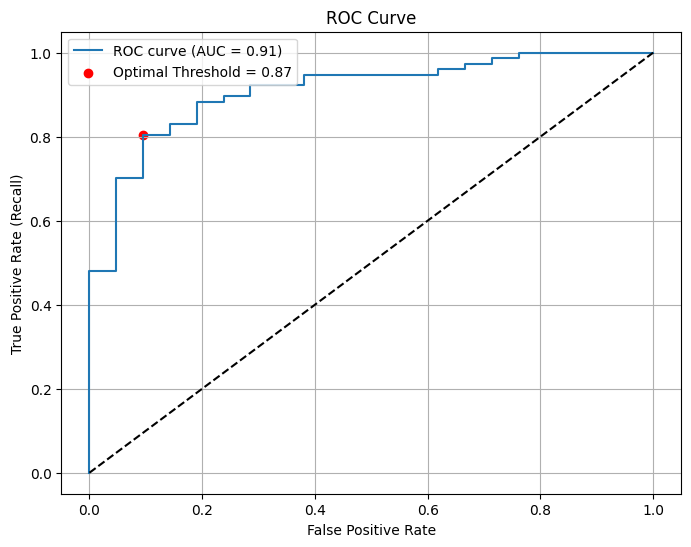

In [64]:
# Question 7

# Find the optimal threshold by drawing the ROC curve. Change the threshold to the optimal value you found from the ROC curve
# and report the changes in the test performance metrics from those reported in Qn 5.

# Solution

# Predict probabilities for class "High"
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Find optimal threshold (closest point to (0,1))
distance = np.sqrt((1 - tpr)**2 + fpr**2)
optimal_idx = np.argmin(distance)
optimal_threshold = thresholds[optimal_idx]

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Predict using the optimal threshold
y_pred_optimal = (y_prob > optimal_threshold).astype(int)

# Confusion matrix
cm_opt = confusion_matrix(y_test, y_pred_optimal)
tn, fp, fn, tp = cm_opt.ravel()

# Evaluation metrics
accuracy_opt = accuracy_score(y_test, y_pred_optimal)
precision_opt = precision_score(y_test, y_pred_optimal)
recall_opt = recall_score(y_test, y_pred_optimal)
specificity_opt = tn / (tn + fp)
f1_opt = f1_score(y_test, y_pred_optimal)

# Report Results
print("Confusion Matrix (Optimal Threshold):")
print(cm_opt)
print(f"\nOptimal Threshold: {optimal_threshold:.2f}")
print("\nEvaluation Metrics:")
print(f"Accuracy    : {accuracy_opt:.2f}")
print(f"Precision   : {precision_opt:.2f}")
print(f"Recall      : {recall_opt:.2f}")
print(f"Specificity : {specificity_opt:.2f}")
print(f"F1 Score    : {f1_opt:.2f}")

Confusion Matrix (Optimal Threshold):
[[19  2]
 [16 61]]

Optimal Threshold: 0.87

Evaluation Metrics:
Accuracy    : 0.82
Precision   : 0.97
Recall      : 0.79
Specificity : 0.90
F1 Score    : 0.87


In [66]:
# Question 8

# Fit a Naïve Bayes model to the training data to predict mpg_high_low using all the other features/variables except mpg, year, origin, and name.
# Predict the mpg_high_low using the test dataset. Plot the ROC curve and report the best threshold on the ROC curve plot.
# Report the AUC on the curve plot as well. Report the accuracy, precision, recall, specificity and F1 score.

# Solution

# Fit Naïve Bayes and 10-fold Cross-Validation on training set
nb = GaussianNB()
cv_score_nb = cross_val_score(nb, X_train, y_train, cv=10, scoring='accuracy')
print("Naïve Bayes 10-Fold CV Accuracy (training set):", cv_score_nb.mean())

# Fit on full training set and predict on test set
nb.fit(X_train, y_train)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

Naïve Bayes 10-Fold CV Accuracy (training set): 0.7647126436781609


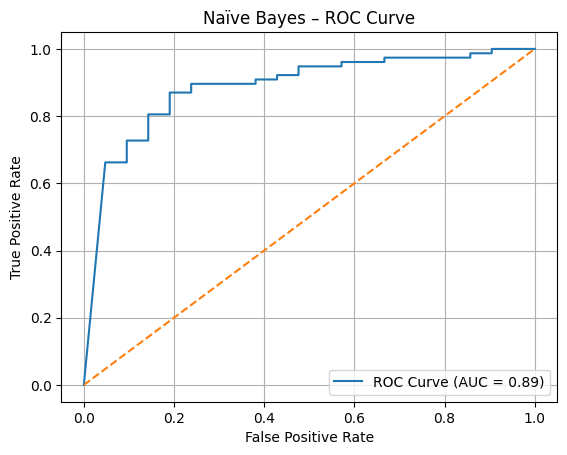

Best Threshold (from ROC): 0.018117791549848446


In [67]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naïve Bayes – ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Find best threshold (closest to top-left)
best_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[best_idx]
print("Best Threshold (from ROC):", best_threshold)

# Predict with best threshold
y_pred_best = (y_prob_nb >= best_threshold).astype(int)

In [68]:
# Report classification metrics
print("\nNaïve Bayes Test Set Performance (with best threshold):")
print(classification_report(y_test, y_pred_best, target_names=['Low', 'High']))


# Evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_best)
precision_nb = precision_score(y_test, y_pred_best)
recall_nb = recall_score(y_test, y_pred_best)
f1_nb = f1_score(y_test, y_pred_best)
specificity_nb = tn / (tn + fp)

# Calculate and print specificity
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)


Naïve Bayes Test Set Performance (with best threshold):
              precision    recall  f1-score   support

         Low       0.63      0.81      0.71        21
        High       0.94      0.87      0.91        77

    accuracy                           0.86        98
   macro avg       0.79      0.84      0.81        98
weighted avg       0.88      0.86      0.86        98

Specificity: 0.8095238095238095


In [69]:
# Question 9

# Fit a KNN model to the training data to predict mpg_high_low using all the other features/variables except mpg, year, origin, and name.
# Use a grid search between 3 and 10 to find the best value of k. Report the accuracy, precision, recall, specificity, F1 score and AUC.

# Solution

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Grid search for best k
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(3, 11))}
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best k
best_k = grid.best_params_['n_neighbors']
print(f"Best k from grid search: {best_k}")

Best k from grid search: 3


In [71]:
# Fit final KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Predict class labels and probabilities
y_pred_knn = best_knn.predict(X_test_scaled)
y_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

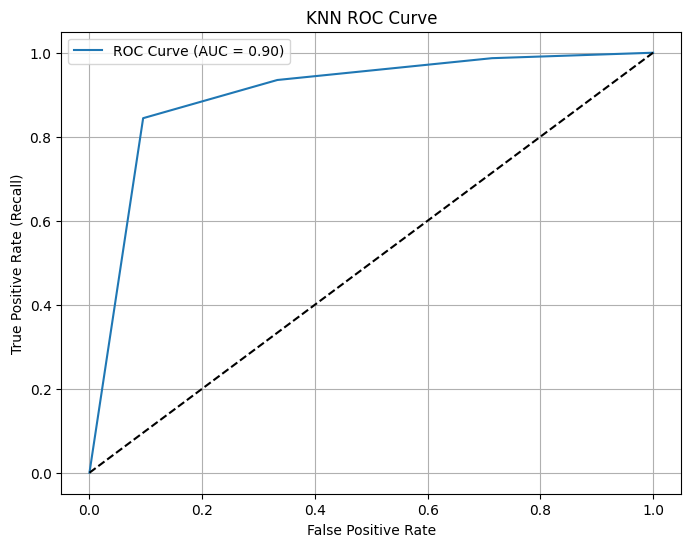

In [72]:
# ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('KNN ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
specificity_knn = tn / (tn + fp)

# Print results
print("Confusion Matrix:")
print(cm_knn)
print("\nEvaluation Metrics:")
print(f"Best k       : {best_k}")
print(f"Accuracy     : {accuracy_knn:.2f}")
print(f"Precision    : {precision_knn:.2f}")
print(f"Recall       : {recall_knn:.2f}")
print(f"Specificity  : {specificity_knn:.2f}")
print(f"F1 Score     : {f1_knn:.2f}")
print(f"AUC          : {auc_knn:.2f}")

Confusion Matrix:
[[14  7]
 [ 5 72]]

Evaluation Metrics:
Best k       : 3
Accuracy     : 0.88
Precision    : 0.91
Recall       : 0.94
Specificity  : 0.67
F1 Score     : 0.92
AUC          : 0.90


In [76]:
# Question 10

# Fit a LDA model to the training data to predict mpg_high_low using all the other features/variables except mpg, year, origin, and name.
# Report the accuracy, precision, recall, specificity and F1 score

# Solution

# 10-fold Cross-Validation on training set
lda = LinearDiscriminantAnalysis()
cv_score_lda = cross_val_score(lda, X_train, y_train, cv=10, scoring='accuracy')
print("LDA 10-Fold CV Accuracy (training set):", cv_score_lda.mean())

# Fit model on full training data
lda.fit(X_train, y_train)

# Predict on test set
y_pred_lda = lda.predict(X_test)

# Classification report (accuracy, precision, recall, F1)
print("\nLDA Test Set Performance:")
print(classification_report(y_test, y_pred_lda, target_names=['Low', 'High']))

# Specificity calculation
cm = confusion_matrix(y_test, y_pred_lda)
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
specificity_lda = specificity

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

print("Specificity:", specificity)

LDA 10-Fold CV Accuracy (training set): 0.826551724137931

LDA Test Set Performance:
              precision    recall  f1-score   support

         Low       0.80      0.38      0.52        21
        High       0.85      0.97      0.91        77

    accuracy                           0.85        98
   macro avg       0.83      0.68      0.71        98
weighted avg       0.84      0.85      0.82        98

Specificity: 0.38095238095238093


In [77]:
# Question 11

# Summarize the performance of the all the above models by creating a dataframe with 4 columns – Model_Name, Accuracy, Precision, Recall,
# Specificity, F1 Score. The data frame should contain one row for each model you built above with each of the columns filled in with the
# appropriate metric. Print out the dataframe. Which model performed the best from an accuracy point of view and which model performed
# best from a recall point of view without adjusting for the threshold?

# Solution

# Create list of model results
model_summary = [
    ['Logistic Regression', accuracy, precision, recall, specificity, f1],
    ['Naive Bayes', accuracy_nb, precision_nb, recall_nb, specificity_nb, f1_nb],
    ['KNN', accuracy_knn, precision_knn, recall_knn, specificity_knn, f1_knn],
    ['LDA', accuracy_lda, precision_lda, recall_lda, specificity_lda, f1_lda]
]

# Convert to DataFrame
summary_df = pd.DataFrame(model_summary, columns=[
    'Model_Name', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score'
])

# Print the summary
print("\n Model Performance Summary:")
print(summary_df)


 Model Performance Summary:
            Model_Name  Accuracy  Precision    Recall  Specificity  F1 Score
0  Logistic Regression  0.877551   0.901235  0.948052     0.380952  0.924051
1          Naive Bayes  0.857143   0.943662  0.870130     0.904762  0.905405
2                  KNN  0.877551   0.911392  0.935065     0.666667  0.923077
3                  LDA  0.846939   0.852273  0.974026     0.380952  0.909091


In [78]:
# Best model by Accuracy
best_accuracy_model = summary_df.loc[summary_df['Accuracy'].idxmax(), 'Model_Name']

# Best model by Recall
best_recall_model = summary_df.loc[summary_df['Recall'].idxmax(), 'Model_Name']

print(f"\n Best Model by Accuracy: {best_accuracy_model}")
print(f"Best Model by Recall  : {best_recall_model}")


 Best Model by Accuracy: Logistic Regression
Best Model by Recall  : LDA
